## 环境配置

In [6]:
!pip install paddlex==1.3.11

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/517.0 KB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.0/517.0 KB 20.5 MB/s eta 0:00:00
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/211.4 KB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.4/211.4 KB 39.3 MB/s eta 0:00:00
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/145.3 KB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 KB 32.8 MB/s eta 0:00:00
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/100.0 KB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 3.5 MB/s eta 0:00:00
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/100.9 KB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 71.7/100.9 KB 172.6 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 71.7/100.9 KB 172.6 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 71.7/100.9 KB 172.6 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━

In [1]:
!nvidia-smi

Wed Apr  6 18:46:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:0A:00.0 Off |                    0 |
| N/A   35C    P0    39W / 300W |      0MiB / 16384MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# install paddle cuda 10.1
!pip install paddlepaddle-gpu==2.2.2.post101 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html


In [7]:
!pip list | grep paddle

paddle2onnx            0.9.2
paddlefsl              1.0.0
paddlehub              2.1.0
paddlenlp              2.1.1
paddlepaddle-gpu       2.2.2.post101
paddleslim             1.1.1
paddlex                1.3.11
tb-paddle              0.3.6


In [2]:
!cd data && wget https://bj.bcebos.com/paddlex/examples2/rebar_count/dataset_reinforcing_steel_bar_counting.zip

--2022-04-05 14:55:52--  https://bj.bcebos.com/paddlex/examples2/rebar_count/dataset_reinforcing_steel_bar_counting.zip
正在解析主机 bj.bcebos.com (bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 bj.bcebos.com (bj.bcebos.com)|182.61.200.195|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 376232294 (359M) [application/octet-stream]
正在保存至: “dataset_reinforcing_steel_bar_counting.zip”

dataset_reinforcing 100%[===================>] 358.80M  48.2MB/s    in 13s     

2022-04-05 14:56:05 (27.9 MB/s) - 已保存 “dataset_reinforcing_steel_bar_counting.zip” [376232294/376232294])



In [5]:
!cd data & unzip data/dataset_reinforcing_steel_bar_counting.zip

Archive:  data/dataset_reinforcing_steel_bar_counting.zip
   creating: dataset_reinforcing_steel_bar_counting/
  inflating: dataset_reinforcing_steel_bar_counting/.DS_Store  
  inflating: dataset_reinforcing_steel_bar_counting/labels.txt  
   creating: dataset_reinforcing_steel_bar_counting/Annotations/
   creating: dataset_reinforcing_steel_bar_counting/JPEGImages/
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/1E45CAAA.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/3EA15847.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/B109F092.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/EDB2FA69.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/46D2A288.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/02EDEB01.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/01D4FEFB.xml  
  inflating: dataset_reinforcing_steel_bar_counting/Annotations/881B376F.xml  

In [7]:
!mv dataset_reinforcing_steel_bar_counting dataset

In [6]:
!paddlex --split_dataset --format VOC --dataset_dir dataset  --val_value 0.2 --test_value 0.1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[04-05 14:59:26 MainThread @logger.py:242] Argv: /opt/conda/envs/python35-paddle120-env/bin/paddlex --split_dataset --format VOC --dataset_dir dataset_reinforcing_steel_bar_counting --val_value 0.2 --test_value 0.1
[04-05 14:59:26 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-pack

## 构建数据集

In [1]:
from paddlex.det import transforms
import paddlex as pdx

# 数据增强都在这个里面做了
train_transforms = transforms.Compose([
    transforms.MixupImage(mixup_epoch=-1),
    transforms.RandomDistort(),
    transforms.RandomExpand(),
    transforms.RandomCrop(),
    transforms.Resize(
        target_size=480, interp='RANDOM'),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(),
])

eval_transforms = transforms.Compose([
    transforms.Resize(
        target_size=480, interp='CUBIC'),
    transforms.Normalize(),
])

train_dataset = pdx.datasets.VOCDetection(
    data_dir='dataset',
    file_list='dataset/train_list.txt',
    label_list='dataset/labels.txt',
    transforms=train_transforms,
    shuffle=True,
    )

eval_dataset = pdx.datasets.VOCDetection(
    data_dir='dataset',
    file_list='dataset/val_list.txt',
    label_list='dataset/labels.txt',
    transforms=eval_transforms,
    shuffle=False,
    )

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


2022-04-06 18:51:35 [INFO]	Starting to read file list from dataset...
2022-04-06 18:51:45 [INFO]	175 samples in file dataset/train_list.txt
creating index...
index created!
2022-04-06 18:51:45 [INFO]	Starting to read file list from dataset...
2022-04-06 18:51:48 [INFO]	50 samples in file dataset/val_list.txt
creating index...
index created!


## 模型训练

In [ ]:
num_classes = len(train_dataset.labels)
model = pdx.det.YOLOv3(num_classes=num_classes, backbone='MobileNetV1', label_smooth=True, ignore_threshold=0.7)

model.train(
    num_epochs=270,                     
    train_dataset=train_dataset,       
    eval_dataset=eval_dataset,           
    pretrain_weights='COCO',             
    learning_rate=0.000125,              
    warmup_steps=1000,                   
    warmup_start_lr=0.0,                 
    save_interval_epochs=5,              
    lr_decay_epochs=[210, 240],          
    save_dir='output/yolov3_mobilnetv1', 
    use_vdl=True)                        


2022-04-06 18:52:51 [INFO]	Downloading yolov3_mobilenet_v1.tar from https://paddlemodels.bj.bcebos.com/object_detection/yolov3_mobilenet_v1.tar


100%|██████████| 96380/96380 [00:01<00:00, 77589.94KB/s]


2022-04-06 18:52:52 [INFO]	Decompressing output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1.tar...


W0406 18:52:52.571177  1152 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0406 18:52:52.575253  1152 device_context.cc:465] device: 0, cuDNN Version: 7.6.


2022-04-06 18:52:56 [INFO]	Load pretrain weights from output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1.
2022-04-06 18:52:56 [WARNING]	[SKIP] Shape of pretrained weight output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1/yolo_output.0.conv.weights doesn't match.(Pretrained: (255, 1024, 1, 1), Actual: (18, 1024, 1, 1))
2022-04-06 18:52:56 [WARNING]	[SKIP] Shape of pretrained weight output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1/yolo_output.0.conv.bias doesn't match.(Pretrained: (255,), Actual: (18,))
2022-04-06 18:52:56 [WARNING]	[SKIP] Shape of pretrained weight output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1/yolo_output.1.conv.weights doesn't match.(Pretrained: (255, 512, 1, 1), Actual: (18, 512, 1, 1))
2022-04-06 18:52:57 [WARNING]	[SKIP] Shape of pretrained weight output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1/yolo_output.1.conv.bias doesn't match.(Pretrained: (255,), Actual: (18,))
2022-04-06 18:52:57 [WARNING]	[SKIP] Shape of pretrained weight output/yolo

100%|██████████| 7/7 [00:09<00:00,  1.15s/it]


2022-04-06 19:02:43 [INFO]	[EVAL] Finished, Epoch=5, bbox_map=37.298178 .
2022-04-06 19:02:44 [INFO]	Model saved in output/yolov3_mobilnetv1/best_model.
2022-04-06 19:02:45 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_5.
2022-04-06 19:02:45 [INFO]	Current evaluated best model in eval_dataset is epoch_5, bbox_map=37.29817808930539
2022-04-06 19:02:57 [INFO]	[TRAIN] Epoch=6/270, Step=1/21, loss=157.226562, lr=1.3e-05, time_each_step=4.92s, eta=8:0:49
2022-04-06 19:03:04 [INFO]	[TRAIN] Epoch=6/270, Step=3/21, loss=389.414154, lr=1.3e-05, time_each_step=4.84s, eta=8:0:38
2022-04-06 19:03:13 [INFO]	[TRAIN] Epoch=6/270, Step=5/21, loss=292.562378, lr=1.4e-05, time_each_step=4.98s, eta=8:0:31
2022-04-06 19:03:22 [INFO]	[TRAIN] Epoch=6/270, Step=7/21, loss=305.352112, lr=1.4e-05, time_each_step=5.0s, eta=8:0:21
2022-04-06 19:03:32 [INFO]	[TRAIN] Epoch=6/270, Step=9/21, loss=330.40274, lr=1.4e-05, time_each_step=5.07s, eta=8:0:12
2022-04-06 19:03:43 [INFO]	[TRAIN] Epoch=6/270, Step=11/2

100%|██████████| 7/7 [00:08<00:00,  1.02s/it]


2022-04-06 19:12:11 [INFO]	[EVAL] Finished, Epoch=10, bbox_map=41.903706 .
2022-04-06 19:12:12 [INFO]	Model saved in output/yolov3_mobilnetv1/best_model.
2022-04-06 19:12:13 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_10.
2022-04-06 19:12:13 [INFO]	Current evaluated best model in eval_dataset is epoch_10, bbox_map=41.90370599138113
2022-04-06 19:12:26 [INFO]	[TRAIN] Epoch=11/270, Step=2/21, loss=167.537857, lr=2.6e-05, time_each_step=4.73s, eta=7:41:48
2022-04-06 19:12:35 [INFO]	[TRAIN] Epoch=11/270, Step=4/21, loss=276.975159, lr=2.7e-05, time_each_step=4.8s, eta=7:41:40
2022-04-06 19:12:45 [INFO]	[TRAIN] Epoch=11/270, Step=6/21, loss=211.640106, lr=2.7e-05, time_each_step=5.02s, eta=7:41:33
2022-04-06 19:12:54 [INFO]	[TRAIN] Epoch=11/270, Step=8/21, loss=274.106903, lr=2.7e-05, time_each_step=5.02s, eta=7:41:23
2022-04-06 19:13:03 [INFO]	[TRAIN] Epoch=11/270, Step=10/21, loss=243.251389, lr=2.7e-05, time_each_step=5.03s, eta=7:41:13
2022-04-06 19:13:10 [INFO]	[TRAIN] Epoch=1

100%|██████████| 7/7 [00:09<00:00,  1.08s/it]


2022-04-06 19:21:24 [INFO]	[EVAL] Finished, Epoch=15, bbox_map=38.297653 .
2022-04-06 19:21:24 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_15.
2022-04-06 19:21:24 [INFO]	Current evaluated best model in eval_dataset is epoch_10, bbox_map=41.90370599138113
2022-04-06 19:21:33 [INFO]	[TRAIN] Epoch=16/270, Step=1/21, loss=215.702255, lr=3.9e-05, time_each_step=4.77s, eta=7:36:8
2022-04-06 19:21:40 [INFO]	[TRAIN] Epoch=16/270, Step=3/21, loss=240.557343, lr=4e-05, time_each_step=4.7s, eta=7:35:57
2022-04-06 19:21:53 [INFO]	[TRAIN] Epoch=16/270, Step=5/21, loss=252.534546, lr=4e-05, time_each_step=4.9s, eta=7:35:51
2022-04-06 19:22:04 [INFO]	[TRAIN] Epoch=16/270, Step=7/21, loss=230.841309, lr=4e-05, time_each_step=5.06s, eta=7:35:43
2022-04-06 19:22:18 [INFO]	[TRAIN] Epoch=16/270, Step=9/21, loss=197.869095, lr=4e-05, time_each_step=5.32s, eta=7:35:36
2022-04-06 19:22:28 [INFO]	[TRAIN] Epoch=16/270, Step=11/21, loss=290.821136, lr=4.1e-05, time_each_step=5.27s, eta=7:35:25
2022-04-

100%|██████████| 7/7 [00:09<00:00,  1.13s/it]


2022-04-06 19:30:49 [INFO]	[EVAL] Finished, Epoch=20, bbox_map=50.839527 .
2022-04-06 19:30:51 [INFO]	Model saved in output/yolov3_mobilnetv1/best_model.
2022-04-06 19:30:51 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_20.
2022-04-06 19:30:51 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 19:31:14 [INFO]	[TRAIN] Epoch=21/270, Step=2/21, loss=262.494202, lr=5.3e-05, time_each_step=5.14s, eta=7:23:7
2022-04-06 19:31:23 [INFO]	[TRAIN] Epoch=21/270, Step=4/21, loss=248.742432, lr=5.3e-05, time_each_step=5.29s, eta=7:22:59
2022-04-06 19:31:30 [INFO]	[TRAIN] Epoch=21/270, Step=6/21, loss=261.061859, lr=5.3e-05, time_each_step=5.27s, eta=7:22:48
2022-04-06 19:31:40 [INFO]	[TRAIN] Epoch=21/270, Step=8/21, loss=210.693741, lr=5.3e-05, time_each_step=5.16s, eta=7:22:36
2022-04-06 19:31:47 [INFO]	[TRAIN] Epoch=21/270, Step=10/21, loss=155.939987, lr=5.4e-05, time_each_step=5.05s, eta=7:22:24
2022-04-06 19:31:55 [INFO]	[TRAIN] Epoch=2

100%|██████████| 7/7 [00:08<00:00,  1.02s/it]


2022-04-06 19:40:37 [INFO]	[EVAL] Finished, Epoch=25, bbox_map=46.007036 .
2022-04-06 19:40:38 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_25.
2022-04-06 19:40:38 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 19:40:45 [INFO]	[TRAIN] Epoch=26/270, Step=1/21, loss=256.592834, lr=6.6e-05, time_each_step=4.64s, eta=7:48:46
2022-04-06 19:40:53 [INFO]	[TRAIN] Epoch=26/270, Step=3/21, loss=253.029572, lr=6.6e-05, time_each_step=4.5s, eta=7:48:35
2022-04-06 19:41:02 [INFO]	[TRAIN] Epoch=26/270, Step=5/21, loss=222.675354, lr=6.6e-05, time_each_step=4.55s, eta=7:48:26
2022-04-06 19:41:10 [INFO]	[TRAIN] Epoch=26/270, Step=7/21, loss=266.899658, lr=6.6e-05, time_each_step=4.4s, eta=7:48:15
2022-04-06 19:41:22 [INFO]	[TRAIN] Epoch=26/270, Step=9/21, loss=254.307526, lr=6.7e-05, time_each_step=4.5s, eta=7:48:8
2022-04-06 19:41:31 [INFO]	[TRAIN] Epoch=26/270, Step=11/21, loss=268.937561, lr=6.7e-05, time_each_step=4.56s, eta=7:47:59
2

100%|██████████| 7/7 [00:08<00:00,  1.03s/it]


2022-04-06 19:49:56 [INFO]	[EVAL] Finished, Epoch=30, bbox_map=39.21381 .
2022-04-06 19:49:57 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_30.
2022-04-06 19:49:57 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 19:50:12 [INFO]	[TRAIN] Epoch=31/270, Step=2/21, loss=263.561951, lr=7.9e-05, time_each_step=5.03s, eta=7:28:21
2022-04-06 19:50:22 [INFO]	[TRAIN] Epoch=31/270, Step=4/21, loss=182.291183, lr=7.9e-05, time_each_step=5.03s, eta=7:28:11
2022-04-06 19:50:33 [INFO]	[TRAIN] Epoch=31/270, Step=6/21, loss=255.153564, lr=7.9e-05, time_each_step=5.15s, eta=7:28:3
2022-04-06 19:50:42 [INFO]	[TRAIN] Epoch=31/270, Step=8/21, loss=221.237961, lr=8e-05, time_each_step=5.13s, eta=7:27:53
2022-04-06 19:50:52 [INFO]	[TRAIN] Epoch=31/270, Step=10/21, loss=181.381821, lr=8e-05, time_each_step=5.16s, eta=7:27:43
2022-04-06 19:51:04 [INFO]	[TRAIN] Epoch=31/270, Step=12/21, loss=228.771332, lr=8e-05, time_each_step=5.4s, eta=7:27:35
2022-

100%|██████████| 7/7 [00:08<00:00,  1.01s/it]


2022-04-06 19:59:17 [INFO]	[EVAL] Finished, Epoch=35, bbox_map=41.126965 .
2022-04-06 19:59:17 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_35.
2022-04-06 19:59:17 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 19:59:25 [INFO]	[TRAIN] Epoch=36/270, Step=1/21, loss=230.295135, lr=9.2e-05, time_each_step=5.36s, eta=7:55:56
2022-04-06 19:59:34 [INFO]	[TRAIN] Epoch=36/270, Step=3/21, loss=243.025055, lr=9.2e-05, time_each_step=5.53s, eta=7:55:48
2022-04-06 19:59:42 [INFO]	[TRAIN] Epoch=36/270, Step=5/21, loss=268.440094, lr=9.2e-05, time_each_step=5.27s, eta=7:55:33
2022-04-06 19:59:50 [INFO]	[TRAIN] Epoch=36/270, Step=7/21, loss=266.094238, lr=9.3e-05, time_each_step=4.95s, eta=7:55:18
2022-04-06 19:59:59 [INFO]	[TRAIN] Epoch=36/270, Step=9/21, loss=263.681366, lr=9.3e-05, time_each_step=4.98s, eta=7:55:8
2022-04-06 20:00:08 [INFO]	[TRAIN] Epoch=36/270, Step=11/21, loss=224.438599, lr=9.3e-05, time_each_step=4.98s, eta=7:54:5

100%|██████████| 7/7 [00:08<00:00,  1.02s/it]


2022-04-06 20:08:32 [INFO]	[EVAL] Finished, Epoch=40, bbox_map=48.506892 .
2022-04-06 20:08:33 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_40.
2022-04-06 20:08:33 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 20:08:51 [INFO]	[TRAIN] Epoch=41/270, Step=2/21, loss=201.900269, lr=0.000105, time_each_step=5.53s, eta=7:47:2
2022-04-06 20:08:59 [INFO]	[TRAIN] Epoch=41/270, Step=4/21, loss=252.363174, lr=0.000105, time_each_step=5.21s, eta=7:46:45
2022-04-06 20:09:12 [INFO]	[TRAIN] Epoch=41/270, Step=6/21, loss=214.728119, lr=0.000106, time_each_step=5.41s, eta=7:46:38
2022-04-06 20:09:27 [INFO]	[TRAIN] Epoch=41/270, Step=8/21, loss=232.254044, lr=0.000106, time_each_step=5.56s, eta=7:46:29
2022-04-06 20:09:38 [INFO]	[TRAIN] Epoch=41/270, Step=10/21, loss=196.193924, lr=0.000106, time_each_step=5.45s, eta=7:46:16
2022-04-06 20:09:47 [INFO]	[TRAIN] Epoch=41/270, Step=12/21, loss=227.934555, lr=0.000106, time_each_step=5.39s, eta

100%|██████████| 7/7 [00:08<00:00,  1.09s/it]


2022-04-06 20:17:58 [INFO]	[EVAL] Finished, Epoch=45, bbox_map=39.018385 .
2022-04-06 20:17:59 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_45.
2022-04-06 20:17:59 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 20:18:13 [INFO]	[TRAIN] Epoch=46/270, Step=1/21, loss=267.315247, lr=0.000118, time_each_step=5.45s, eta=7:5:49
2022-04-06 20:18:21 [INFO]	[TRAIN] Epoch=46/270, Step=3/21, loss=268.029572, lr=0.000118, time_each_step=5.23s, eta=7:5:34
2022-04-06 20:18:34 [INFO]	[TRAIN] Epoch=46/270, Step=5/21, loss=282.37851, lr=0.000119, time_each_step=5.46s, eta=7:5:27
2022-04-06 20:18:44 [INFO]	[TRAIN] Epoch=46/270, Step=7/21, loss=239.818817, lr=0.000119, time_each_step=5.47s, eta=7:5:17
2022-04-06 20:18:51 [INFO]	[TRAIN] Epoch=46/270, Step=9/21, loss=287.696259, lr=0.000119, time_each_step=5.32s, eta=7:5:4
2022-04-06 20:19:00 [INFO]	[TRAIN] Epoch=46/270, Step=11/21, loss=239.712601, lr=0.000119, time_each_step=5.23s, eta=7:4:52

100%|██████████| 7/7 [00:09<00:00,  1.17s/it]


2022-04-06 20:27:25 [INFO]	[EVAL] Finished, Epoch=50, bbox_map=38.216376 .
2022-04-06 20:27:26 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_50.
2022-04-06 20:27:26 [INFO]	Current evaluated best model in eval_dataset is epoch_20, bbox_map=50.83952743252503
2022-04-06 20:27:45 [INFO]	[TRAIN] Epoch=51/270, Step=2/21, loss=252.482758, lr=0.000125, time_each_step=5.04s, eta=6:31:31
2022-04-06 20:27:58 [INFO]	[TRAIN] Epoch=51/270, Step=4/21, loss=242.604813, lr=0.000125, time_each_step=5.24s, eta=6:31:25
2022-04-06 20:28:09 [INFO]	[TRAIN] Epoch=51/270, Step=6/21, loss=241.99913, lr=0.000125, time_each_step=5.41s, eta=6:31:17
2022-04-06 20:28:19 [INFO]	[TRAIN] Epoch=51/270, Step=8/21, loss=242.170456, lr=0.000125, time_each_step=5.49s, eta=6:31:7
2022-04-06 20:28:28 [INFO]	[TRAIN] Epoch=51/270, Step=10/21, loss=253.391098, lr=0.000125, time_each_step=5.38s, eta=6:30:55
2022-04-06 20:28:37 [INFO]	[TRAIN] Epoch=51/270, Step=12/21, loss=232.397583, lr=0.000125, time_each_step=5.34s, eta=

100%|██████████| 7/7 [00:09<00:00,  1.14s/it]


2022-04-06 20:37:03 [INFO]	[EVAL] Finished, Epoch=55, bbox_map=58.613726 .
2022-04-06 20:37:04 [INFO]	Model saved in output/yolov3_mobilnetv1/best_model.
2022-04-06 20:37:05 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_55.
2022-04-06 20:37:05 [INFO]	Current evaluated best model in eval_dataset is epoch_55, bbox_map=58.61372605198228
2022-04-06 20:37:14 [INFO]	[TRAIN] Epoch=56/270, Step=1/21, loss=207.089645, lr=0.000125, time_each_step=5.35s, eta=7:4:17
2022-04-06 20:37:21 [INFO]	[TRAIN] Epoch=56/270, Step=3/21, loss=200.975952, lr=0.000125, time_each_step=5.34s, eta=7:4:6
2022-04-06 20:37:31 [INFO]	[TRAIN] Epoch=56/270, Step=5/21, loss=271.240265, lr=0.000125, time_each_step=5.16s, eta=7:3:52
2022-04-06 20:37:44 [INFO]	[TRAIN] Epoch=56/270, Step=7/21, loss=228.370651, lr=0.000125, time_each_step=5.11s, eta=7:3:41
2022-04-06 20:37:56 [INFO]	[TRAIN] Epoch=56/270, Step=9/21, loss=225.889099, lr=0.000125, time_each_step=5.35s, eta=7:3:34
2022-04-06 20:38:04 [INFO]	[TRAIN] Epoch=56

100%|██████████| 7/7 [00:09<00:00,  1.05s/it]


2022-04-06 20:46:21 [INFO]	[EVAL] Finished, Epoch=60, bbox_map=48.302807 .
2022-04-06 20:46:22 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_60.
2022-04-06 20:46:22 [INFO]	Current evaluated best model in eval_dataset is epoch_55, bbox_map=58.61372605198228
2022-04-06 20:46:50 [INFO]	[TRAIN] Epoch=61/270, Step=2/21, loss=234.662109, lr=0.000125, time_each_step=5.65s, eta=6:40:43
2022-04-06 20:47:01 [INFO]	[TRAIN] Epoch=61/270, Step=4/21, loss=222.550934, lr=0.000125, time_each_step=5.86s, eta=6:40:35
2022-04-06 20:47:13 [INFO]	[TRAIN] Epoch=61/270, Step=6/21, loss=213.065384, lr=0.000125, time_each_step=5.94s, eta=6:40:25
2022-04-06 20:47:23 [INFO]	[TRAIN] Epoch=61/270, Step=8/21, loss=225.539764, lr=0.000125, time_each_step=5.87s, eta=6:40:12
2022-04-06 20:47:29 [INFO]	[TRAIN] Epoch=61/270, Step=10/21, loss=206.167252, lr=0.000125, time_each_step=5.73s, eta=6:39:59
2022-04-06 20:47:39 [INFO]	[TRAIN] Epoch=61/270, Step=12/21, loss=165.01825, lr=0.000125, time_each_step=5.78s, eta

100%|██████████| 7/7 [00:08<00:00,  1.08s/it]


2022-04-06 20:55:33 [INFO]	[EVAL] Finished, Epoch=65, bbox_map=56.080562 .
2022-04-06 20:55:34 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_65.
2022-04-06 20:55:34 [INFO]	Current evaluated best model in eval_dataset is epoch_55, bbox_map=58.61372605198228
2022-04-06 20:55:46 [INFO]	[TRAIN] Epoch=66/270, Step=1/21, loss=127.275291, lr=0.000125, time_each_step=4.75s, eta=5:55:19
2022-04-06 20:55:53 [INFO]	[TRAIN] Epoch=66/270, Step=3/21, loss=224.53743, lr=0.000125, time_each_step=4.73s, eta=5:55:9
2022-04-06 20:56:01 [INFO]	[TRAIN] Epoch=66/270, Step=5/21, loss=187.518158, lr=0.000125, time_each_step=4.79s, eta=5:55:0
2022-04-06 20:56:08 [INFO]	[TRAIN] Epoch=66/270, Step=7/21, loss=242.72998, lr=0.000125, time_each_step=4.83s, eta=5:54:52
2022-04-06 20:56:21 [INFO]	[TRAIN] Epoch=66/270, Step=9/21, loss=221.438812, lr=0.000125, time_each_step=4.95s, eta=5:54:43
2022-04-06 20:56:29 [INFO]	[TRAIN] Epoch=66/270, Step=11/21, loss=235.530167, lr=0.000125, time_each_step=4.86s, eta=5:5

100%|██████████| 7/7 [00:08<00:00,  1.00s/it]


2022-04-06 21:05:09 [INFO]	[EVAL] Finished, Epoch=70, bbox_map=58.479673 .
2022-04-06 21:05:10 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_70.
2022-04-06 21:05:10 [INFO]	Current evaluated best model in eval_dataset is epoch_55, bbox_map=58.61372605198228
2022-04-06 21:05:27 [INFO]	[TRAIN] Epoch=71/270, Step=2/21, loss=238.242752, lr=0.000125, time_each_step=5.32s, eta=6:47:1
2022-04-06 21:05:38 [INFO]	[TRAIN] Epoch=71/270, Step=4/21, loss=218.131119, lr=0.000125, time_each_step=5.26s, eta=6:46:49
2022-04-06 21:05:45 [INFO]	[TRAIN] Epoch=71/270, Step=6/21, loss=274.255096, lr=0.000125, time_each_step=5.08s, eta=6:46:36
2022-04-06 21:05:59 [INFO]	[TRAIN] Epoch=71/270, Step=8/21, loss=221.797836, lr=0.000125, time_each_step=5.42s, eta=6:46:30
2022-04-06 21:06:09 [INFO]	[TRAIN] Epoch=71/270, Step=10/21, loss=252.702454, lr=0.000125, time_each_step=5.43s, eta=6:46:20
2022-04-06 21:06:21 [INFO]	[TRAIN] Epoch=71/270, Step=12/21, loss=184.271439, lr=0.000125, time_each_step=5.5s, eta=

100%|██████████| 7/7 [00:08<00:00,  1.02s/it]


2022-04-06 21:15:03 [INFO]	[EVAL] Finished, Epoch=75, bbox_map=56.770248 .
2022-04-06 21:15:04 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_75.
2022-04-06 21:15:04 [INFO]	Current evaluated best model in eval_dataset is epoch_55, bbox_map=58.61372605198228
2022-04-06 21:15:13 [INFO]	[TRAIN] Epoch=76/270, Step=1/21, loss=219.495789, lr=0.000125, time_each_step=5.06s, eta=5:54:28
2022-04-06 21:15:22 [INFO]	[TRAIN] Epoch=76/270, Step=3/21, loss=201.353729, lr=0.000125, time_each_step=5.16s, eta=5:54:19
2022-04-06 21:15:32 [INFO]	[TRAIN] Epoch=76/270, Step=5/21, loss=167.685013, lr=0.000125, time_each_step=5.26s, eta=5:54:11
2022-04-06 21:15:40 [INFO]	[TRAIN] Epoch=76/270, Step=7/21, loss=213.46701, lr=0.000125, time_each_step=5.1s, eta=5:53:58
2022-04-06 21:15:52 [INFO]	[TRAIN] Epoch=76/270, Step=9/21, loss=183.415161, lr=0.000125, time_each_step=5.19s, eta=5:53:49
2022-04-06 21:16:03 [INFO]	[TRAIN] Epoch=76/270, Step=11/21, loss=244.743195, lr=0.000125, time_each_step=5.23s, eta=5

100%|██████████| 7/7 [00:08<00:00,  1.04s/it]


2022-04-06 21:24:15 [INFO]	[EVAL] Finished, Epoch=80, bbox_map=54.802147 .
2022-04-06 21:24:15 [INFO]	Model saved in output/yolov3_mobilnetv1/epoch_80.
2022-04-06 21:24:15 [INFO]	Current evaluated best model in eval_dataset is epoch_55, bbox_map=58.61372605198228
2022-04-06 21:24:34 [INFO]	[TRAIN] Epoch=81/270, Step=2/21, loss=222.21463, lr=0.000125, time_each_step=5.35s, eta=5:47:12
2022-04-06 21:24:40 [INFO]	[TRAIN] Epoch=81/270, Step=4/21, loss=203.128967, lr=0.000125, time_each_step=5.04s, eta=5:46:56
2022-04-06 21:24:50 [INFO]	[TRAIN] Epoch=81/270, Step=6/21, loss=122.816948, lr=0.000125, time_each_step=4.91s, eta=5:46:44
2022-04-06 21:25:02 [INFO]	[TRAIN] Epoch=81/270, Step=8/21, loss=199.337769, lr=0.000125, time_each_step=5.17s, eta=5:46:37
2022-04-06 21:25:14 [INFO]	[TRAIN] Epoch=81/270, Step=10/21, loss=225.505737, lr=0.000125, time_each_step=5.29s, eta=5:46:28
2022-04-06 21:25:28 [INFO]	[TRAIN] Epoch=81/270, Step=12/21, loss=180.477493, lr=0.000125, time_each_step=5.42s, eta

## 模型可视化


### 训练过程

![](https://ai-studio-static-online.cdn.bcebos.com/a5af29d8d48149ffb46cd84891eb5fe873ff92fbc4a5488a9c1cdba4da0cdeb8)



### 模型结构

![](https://ai-studio-static-online.cdn.bcebos.com/e4a1b1df3bbc48c39b6b456f5613ce248ca9b77539434bbe8c8fc663af93b1ba)



结果比对



## 模型推理

In [4]:
import glob
import numpy as np
import threading
import time
import random
import os
import base64
import cv2
import json
import paddlex as pdx

# 待预测图片路径
image_name = 'dataset/JPEGImages/4B145787.jpg'

# 预测模型加载
model = pdx.load_model('output/yolov3_mobilnetv1/best_model')

# 读取图片与获取预测结果
img = cv2.imread(image_name)
img = np.array(img)
result = model.predict(img)

# 解析预测结果，并保存到txt中
keep_results = []
areas = []
f = open('result.txt', 'a')
count = 0
for dt in np.array(result):
    cname, bbox, score = dt['category'], dt['bbox'], dt['score']
    if score < 0.5:
        continue
    keep_results.append(dt)
    count += 1
    f.write(str(dt) + '\n')
    f.write('\n')
    areas.append(bbox[2] * bbox[3])
areas = np.asarray(areas)
sorted_idxs = np.argsort(-areas).tolist()
keep_results = [keep_results[k]
                for k in sorted_idxs] if len(keep_results) > 0 else []
print(keep_results)
print(count)
f.write("the total number is :" + str(int(count)))
f.close()

# 可视化保存
pdx.det.visualize(
    image_name, result, threshold=0.5, save_dir='./output/yolov3_mobilnetv1')

2022-04-08 16:02:30 [INFO]	Model[YOLOv3] loaded.
[{'category_id': 0, 'bbox': [1176.9515380859375, 569.1632690429688, 183.690185546875, 222.8746337890625], 'score': 0.6615109443664551, 'category': 'rebar'}, {'category_id': 0, 'bbox': [737.2535400390625, 847.9447631835938, 189.6654052734375, 202.98358154296875], 'score': 0.5170831680297852, 'category': 'rebar'}, {'category_id': 0, 'bbox': [655.194091796875, 241.90432739257812, 185.734130859375, 205.4632568359375], 'score': 0.5340884923934937, 'category': 'rebar'}, {'category_id': 0, 'bbox': [486.3708190917969, 736.8555908203125, 184.14382934570312, 186.7315673828125], 'score': 0.5307521820068359, 'category': 'rebar'}, {'category_id': 0, 'bbox': [453.7024841308594, 361.2637634277344, 178.23355102539062, 186.22158813476562], 'score': 0.523101270198822, 'category': 'rebar'}, {'category_id': 0, 'bbox': [334.11529541015625, 759.9599609375, 175.81927490234375, 183.843505859375], 'score': 0.7749667763710022, 'category': 'rebar'}, {'category_id'

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'col

2022-04-08 16:02:36 [INFO]	The visualized result is saved as ./output/yolov3_mobilnetv1/visualize_4B145787.jpg


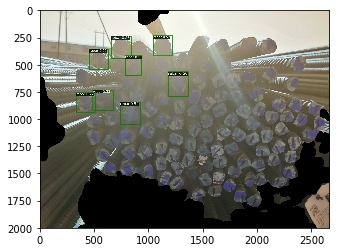

In [8]:
%matplotlib inline 
from matplotlib import pyplot as plt

image_name = "./output/yolov3_mobilnetv1/visualize_4B145787.jpg"
img2 = cv2.imread(image_name)
img2 = np.array(img2)
plt.imshow(img2)